In [39]:
import scipy.ndimage
import pandas as pd
import re
import glob

losses_dict = {}
for name in glob.glob("log/*.log"):
    with open(name) as f:
        log = f.read()
    losses_dict[name.split(".")[0].split("/")[1]] = [float(v) for v in re.findall(r'mean loss (.*) \|', log)]

    
lr_dict = {}
for name in glob.glob("log/*.log"):
    with open(name) as f:
        log = f.read()
    lr_dict[name.split(".")[0].split("/")[1]] =  [float(v) for v in re.findall(r'lr (.*) data', log)]


In [40]:

losses_dict.keys()

dict_keys(['featurewise_sin_x', 'predict_linear_nlayer12', 'predict_mlp_nlayer_6_output_attention_emsize_512', 'predict_mlp_nlayer_12_emsize512', 'defaults_k_aggregate_8_batch_size_128', 'lr_001', 'onehot_classes_batch_512', 'predict_mlp_nlayer_6_output_attention_for_real', 'defaults_k_aggregate_2_batch_size_128', 'nlayers_6_emsize_256', 'predict_mlp_nlayer_6_output_attention_lr0001', 'featurewise_nlayer6_layernorm_dfeature_0_lr0001', 'featurewise_nlayer6_layernorm_deep_mlp_no_combine', 'featurewise_nlayer6_layernorm_deep_mlp_no_combine_again_continued', 'continue_predict_mlp_emsize512', 'onehot_classes', 'more_training_lr00001', 'positional_encoding_complicated_lr00001', 'nlayers_6_emsize_256_onehot', 'predict_mlp_nlayer_6_emsize512', 'defaults', 'featurewise_nlayer6_layernorm_deep_mlp', 'featurewise_nlayer6_layernorm_dfeature_0', 'try_more_training', 'featurewise_nlayer12_combine_layer_weight_decay_continued', 'num_features_1000', 'defaults_k_aggregate_8', 'positional_encoding_compli

In [41]:
# for drop in ['lr_00001', 'defaults_k_aggregate_8_batch_size_128', 'lr_001']:
#     del losses_dict[drop]

In [42]:
def make_long_loss_df(losses_dict, smooth=None):
    max_len = max(len(v) for v in losses_dict.values())
    bla = pd.DataFrame(index=range(max_len), columns=losses_dict.keys())
    for name, losses in losses_dict.items():
        if smooth is not None:
            losses = smooth(losses)
        bla[name].iloc[:len(losses)] = losses
    long = bla.unstack().reset_index()
    long.columns = ['run', 'epoch', 'loss']
    return long

In [43]:
losses_dict.keys()

dict_keys(['featurewise_sin_x', 'predict_linear_nlayer12', 'predict_mlp_nlayer_6_output_attention_emsize_512', 'predict_mlp_nlayer_12_emsize512', 'defaults_k_aggregate_8_batch_size_128', 'lr_001', 'onehot_classes_batch_512', 'predict_mlp_nlayer_6_output_attention_for_real', 'defaults_k_aggregate_2_batch_size_128', 'nlayers_6_emsize_256', 'predict_mlp_nlayer_6_output_attention_lr0001', 'featurewise_nlayer6_layernorm_dfeature_0_lr0001', 'featurewise_nlayer6_layernorm_deep_mlp_no_combine', 'featurewise_nlayer6_layernorm_deep_mlp_no_combine_again_continued', 'continue_predict_mlp_emsize512', 'onehot_classes', 'more_training_lr00001', 'positional_encoding_complicated_lr00001', 'nlayers_6_emsize_256_onehot', 'predict_mlp_nlayer_6_emsize512', 'defaults', 'featurewise_nlayer6_layernorm_deep_mlp', 'featurewise_nlayer6_layernorm_dfeature_0', 'try_more_training', 'featurewise_nlayer12_combine_layer_weight_decay_continued', 'num_features_1000', 'defaults_k_aggregate_8', 'positional_encoding_compli

In [44]:
[x for x in losses_dict if "token" in x]

['continue_predict_mlp_emsize512_special_token']

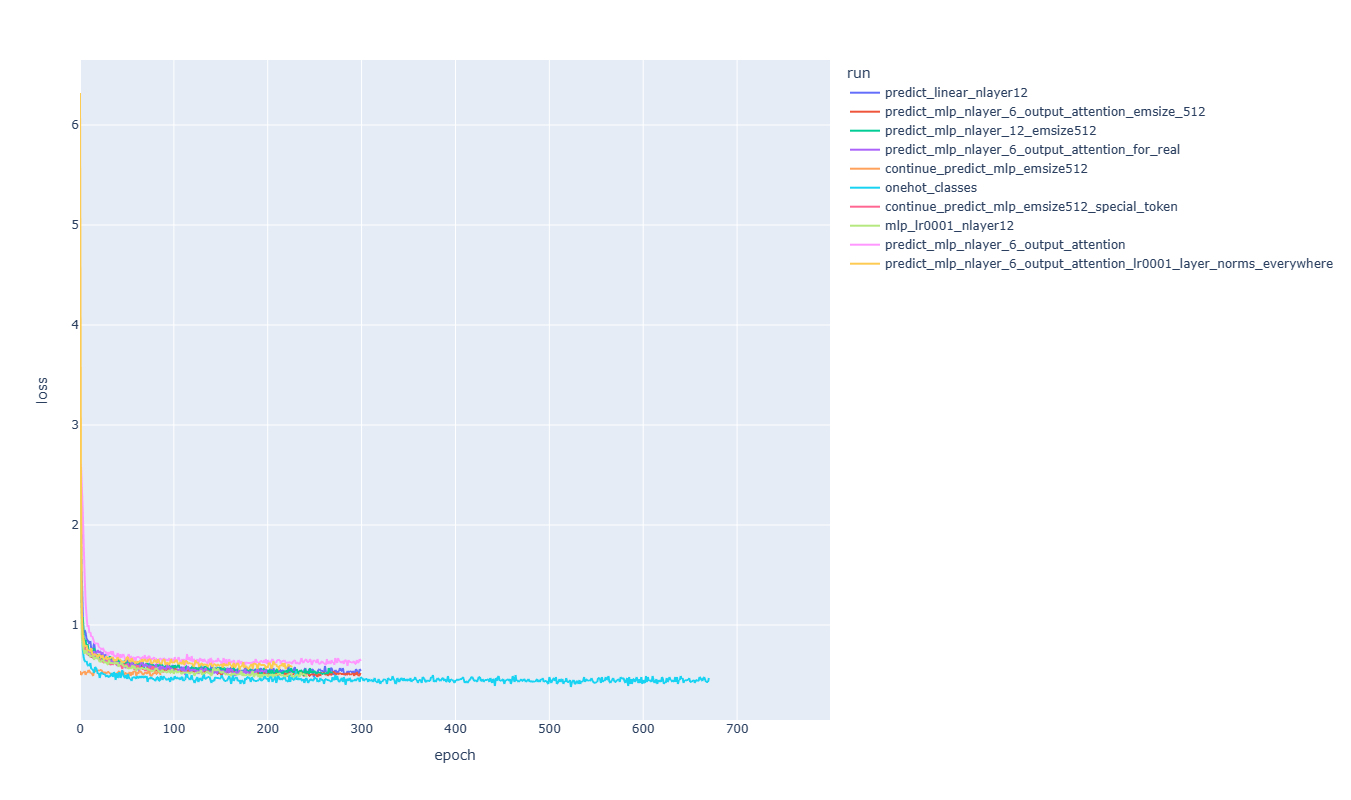

In [45]:
import plotly.express as px
show_only = ['onehot_classes', 'predict_linear_nlayer12', 'predict_mlp_nlayer_12_emsize512', 'predict_mlp_nlayer_6_output_attention', 'predict_mlp_nlayer_6_output_attention_for_real', 'predict_mlp_nlayer_6_output_attention_lr0001_layer_norms_everywhere', 'predict_mlp_nlayer_6_output_attention_emsize_512', 'continue_predict_mlp_emsize512', 'continue_predict_mlp_emsize512_special_token', 'mlp_lr0001_nlayer12']

long_df = make_long_loss_df(losses_dict)
long_df = long_df[long_df.run.isin(show_only)]
fig = px.line(long_df, x="epoch", y='loss', color="run")
fig.update_layout(height=800)
fig

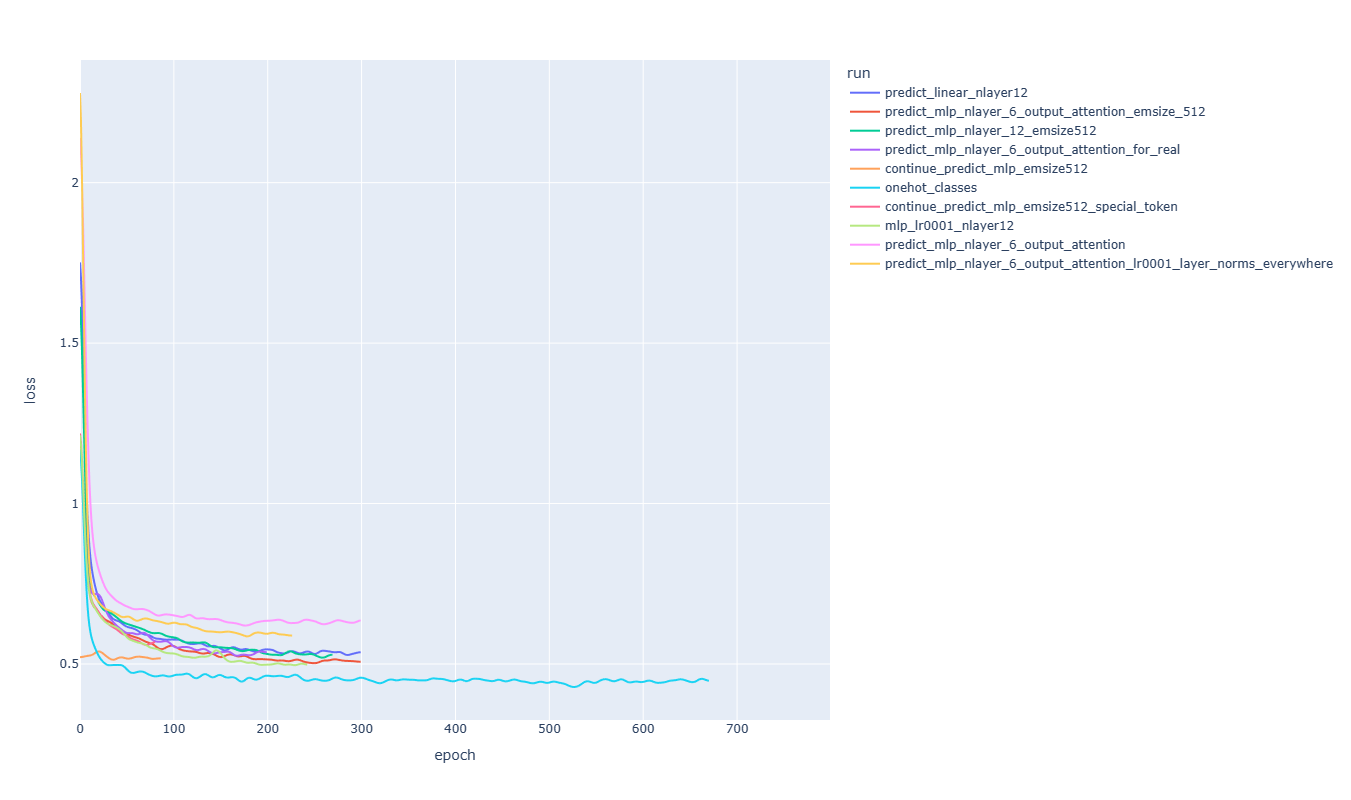

In [46]:
long_df = make_long_loss_df(losses_dict, smooth=lambda x : scipy.ndimage.gaussian_filter1d(x, 4))
long_df = long_df[long_df.run.isin(show_only)]
fig = px.line(long_df, x="epoch", y='loss', color="run")
fig.update_layout(height=800)
fig

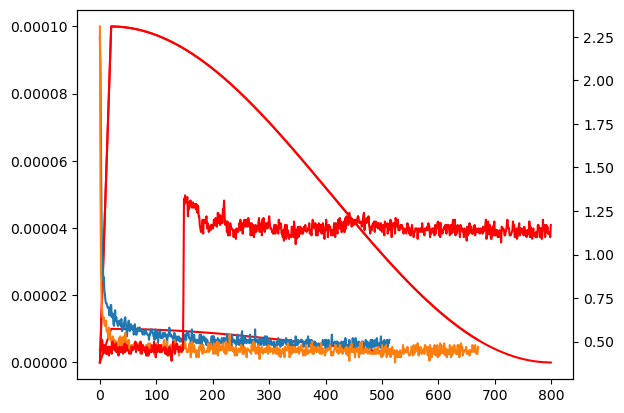

In [131]:
import matplotlib.pyplot as plt
#plt.plot(lr_dict['lr_001'], c='g')
plt.plot(lr_dict['lr_00001'], c='r')
plt.plot(lr_dict['onehot_classes'], c='r')
plt.plot(lr_dict['try_more_training'], c='r')


ax = plt.twinx()
#ax.plot(losses_dict['lr_001'])
ax.plot(losses_dict['lr_00001'])
ax.plot(losses_dict['onehot_classes'])
ax.plot(losses_dict['try_more_training'], c='r')
